## Stack Overflow Developer Survey 2020

December 2011 Stack Overflow launched their first Annual User Survey to measure changes in user demographics and trends from the previous year. Stack Overflow have continued to reach out to the developer community to ask them a variety of questions, everything from their favorite technologies to their job preferences. The survey results are published and are available to view here: https://insights.stackoverflow.com/survey and includes questions with numerical answers (e.g. age, salary) and questions with categorical answers from multiple choice options ( "choose one" or "choose all that apply" ). 

In February 2020, almost 65,000 responses were collected from over 180 countries and dependent territories.  The survey asked respondents 61 questions (i.e., variables), including two questions regarding what programming languages users have done extensive development work in over the past year, and which languages they want to work in over the next year.  

The aim of this project is to explore the data provided by Stack Overflows' developer community; analyse correlations between programming languages and between other frameworks, libraries, and tools (i.e., other technologies) users have done extensive development work in over the past year.

### **Load Libraries.** 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
plt.style.use('ggplot')
import datetime

### **Gather Data.** 

In [2]:
# Read csv file and specify the parameters: set the index column as respondent
sOverflow = pd.read_csv("data/survey_2020.csv", index_col='Respondent')
sOverflow.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
#Check number of rows & columns
sOverflow.shape

(64461, 60)

In [4]:
#Filter data
stackO = sOverflow[['DevType','OpSys','YearsCode','YearsCodePro','Country',
                    'Hobbyist','Age','Gender','Ethnicity','Employment',
                    'EdLevel','UndergradMajor','NEWEdImpt','NEWLearn',
                    'LanguageDesireNextYear','LanguageWorkedWith']]
stackO.head()
#64461 rows × 16 columns

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
1,"Developer, desktop or enterprise applications;...",Windows,36,27,Germany,Yes,NaN,Man,White or of European descent,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript
2,"Developer, full-stack;Developer, mobile",MacOS,7,4,United Kingdom,No,NaN,NaN,NaN,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,Python;Swift,JavaScript;Swift
3,NaN,Linux-based,4,NaN,Russian Federation,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,Objective-C;Python;Swift,Objective-C;Python;Swift
4,NaN,Linux-based,7,4,Albania,Yes,25.0,Man,White or of European descent,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Not at all important/not necessary,Once a year,NaN,NaN
5,NaN,Windows,15,8,United States,Yes,31.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once a year,Java;Ruby;Scala,HTML/CSS;Ruby;SQL


## **Data Filtering: Selected a smaller part the data set to use for viewing and analysis.** 

>Subset: StackOverflow Survey Results for the U.S

In [5]:
stackO_US = stackO.loc[stackO['Country'] == 'United States']
stackO_US.head()
#12469 rows × 16 columns

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
5,NaN,Windows,15,8,United States,Yes,31.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once a year,Java;Ruby;Scala,HTML/CSS;Ruby;SQL
8,"Developer, back-end;Developer, desktop or ente...",Linux-based,17,13,United States,Yes,36.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Not at all important/not necessary,Once a year,JavaScript,Python;SQL
14,"Developer, desktop or enterprise applications;...",Windows,5,1,United States,Yes,27.0,Man,White or of European descent,Employed full-time,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Somewhat important,Every few months,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript
17,"Developer, full-stack",Windows,7,3,United States,Yes,25.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...,C#;HTML/CSS;JavaScript;Python;SQL;VBA
18,"Developer, back-end",Linux-based,19,12,United States,Yes,32.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once every few years,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl


In [6]:
# Overview of data shape and composition
stackO_US.shape

(12469, 16)

## **YearsCode** 

>Including any education, how many years have you been coding in total?

In [7]:
#Check reponse options
stackO_US['YearsCode'].unique()

array(['15', '17', '5', '7', '19', '9', '20', '3', '6', '25', '16', '36',
       '8', '38', '2', '33', '21', '30', '10', '37', '13', '27', '11',
       '35', '24', '50', '4', '23', '22', '18', '14', '44', '26', '12',
       '42', '40', '31', '34', '43', '28', '32', '29', 'Less than 1 year',
       'More than 50 years', '41', '1', nan, '39', '46', '47', '45', '49',
       '48'], dtype=object)

## **YearsCodePro** 

>NOT including education, how many years have you coded professionally (as a part of your work)?

In [8]:
#Check reponse options
stackO_US['YearsCodePro'].unique()

array(['8', '13', '1', '3', '12', '20', nan, '10', '29', '4', '23', '14',
       '15', '16', '7', '25', '2', '11', 'Less than 1 year', '5', '21',
       '19', '35', '18', '6', '32', '28', '9', '22', '30', '38', '24',
       '17', '31', 'More than 50 years', '33', '34', '26', '27', '36',
       '40', '39', '37', '41', '45', '47', '42', '43', '44', '48', '46',
       '49'], dtype=object)

>## Quality problem
>- (Q2) **`stackO_Us`** variables (i.e. columns) `YearsCode` and `YearsCodePro`  contain dtype=object, rather than numerical values.
### Solution
- Change string observations (i.e. pandas type 'object') of variable `YearsCode` to numerical.
- Change string observations (i.e. pandas type 'object') of variable `YearsCodePro` to numerical.

In [9]:
yCodeless=stackO_US[stackO_US['YearsCode']=='Less than 1 year']
yCodemore =stackO_US[stackO_US['YearsCode']=='More than 50 years']
yCode_proLess=stackO_US[stackO_US['YearsCodePro']=='Less than 1 year']
yCode_proMore=stackO_US[stackO_US['YearsCodePro']=='More than 50 years']

print(f"Years Code Less than 1 year:  {len(yCodeless)}")
print(f"Years Code More than 50 year: {len(yCodemore)}")
print(f"Years Code Pro Less than 1 year:  {len(yCode_proLess)}")
print(f"Years Code Pro More than 50 year: {len(yCode_proMore)}")

Years Code Less than 1 year:  94
Years Code More than 50 year: 72
Years Code Pro Less than 1 year:  407
Years Code Pro More than 50 year: 20


In [10]:
#convert 'More than 50 years' to numeric value
stackO_US= stackO_US.replace('More than 50 years','50.5')

#convert 'Less than 1 year' to numeric value.
stackO_US= stackO_US.replace('Less than 1 year','0.5')

print(len(stackO_US[stackO_US['YearsCode']=='0.5']))
print(len(stackO_US[stackO_US['YearsCode']=='50.5']))
print(len(stackO_US[stackO_US['YearsCodePro']=='0.5']))
print(len(stackO_US[stackO_US['YearsCodePro']=='50.5']))

94
72
407
20


In [11]:
#convert columns to numeric
stackO_US['YearsCode'] = pd.to_numeric(stackO_US['YearsCode'])
stackO_US['YearsCodePro'] = pd.to_numeric(stackO_US['YearsCodePro'])
#stackO_US.head()

### Check: Data Type

In [12]:
stackO_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12469 entries, 5 to 64858
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DevType                 10355 non-null  object 
 1   OpSys                   11409 non-null  object 
 2   YearsCode               11759 non-null  float64
 3   YearsCodePro            9945 non-null   float64
 4   Country                 12469 non-null  object 
 5   Hobbyist                12469 non-null  object 
 6   Age                     9619 non-null   float64
 7   Gender                  10490 non-null  object 
 8   Ethnicity               10074 non-null  object 
 9   Employment              12417 non-null  object 
 10  EdLevel                 11732 non-null  object 
 11  UndergradMajor          10701 non-null  object 
 12  NEWEdImpt               10410 non-null  object 
 13  NEWLearn                11353 non-null  object 
 14  LanguageDesireNextYear  10891 non-null

In [13]:
# Check number of rows & columns
stackO_US.shape

(12469, 16)

In [14]:
# identify number of rows that do not specify years code
nanValues=stackO_US[['YearsCode','YearsCodePro']].isna().sum()
nanValues

YearsCode        710
YearsCodePro    2524
dtype: int64

In [15]:
df_US = stackO_US.sort_values(by ='YearsCode',ascending = True)
df_US

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
57699,NaN,NaN,0.5,NaN,United States,Yes,12.0,Woman,NaN,Student,Primary/elementary school,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN
63358,NaN,NaN,0.5,NaN,United States,Yes,NaN,NaN,NaN,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Very important,NaN,NaN,NaN
48495,Scientist,Windows,0.5,NaN,United States,Yes,20.0,Man,White or of European descent,"Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,Somewhat important,Once a decade,NaN,NaN
26687,NaN,Windows,0.5,NaN,United States,Yes,NaN,Man,Middle Eastern,"Not employed, and not looking for work",I never completed any formal education,NaN,NaN,NaN,JavaScript,NaN
54294,NaN,Windows,0.5,NaN,United States,Yes,17.0,Man,Hispanic or Latino/a/x,Student,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN,C++;Go;HTML/CSS;JavaScript;PHP;TypeScript,HTML/CSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42314,NaN,NaN,NaN,NaN,United States,Yes,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
43211,Data or business analyst;Data scientist or mac...,NaN,NaN,4.0,United States,Yes,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
44176,NaN,NaN,NaN,NaN,United States,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Save and Export Cleaned File as CSV
df_US.to_csv("data/df_US.csv")

In [18]:
# Displays the variables `Age` ,`YearsCode` and `YearsCodePro` are of type float now. 
df_US.describe()

,YearsCode,YearsCodePro,Age
count,11759.000000,9945.000000,9619.000000
mean,15.671826,10.669130,33.667491
std,11.388854,9.490113,10.998300
min,0.500000,0.500000,1.000000
25%,7.000000,3.000000,26.000000
50%,12.000000,7.000000,31.000000
75%,22.000000,15.000000,39.000000
max,50.500000,50.500000,99.000000


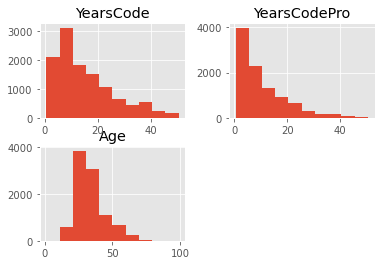

In [19]:
df_US.hist();

## **Gender** 

>Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.

In [ ]:
#Check reponse options
stackO_US['Gender'].unique()

In [ ]:
#Check the number of reponses for Gender

nan = stackO_US[stackO_US['Gender']=='nan']
male = stackO_US[stackO_US['Gender']=='Man']
female = stackO_US[stackO_US['Gender']=='Woman']
man = stackO_US[stackO_US['Gender']=='Man;Non-binary, genderqueer, or gender non-conforming']
lgbtq = stackO_US[stackO_US['Gender']=='Non-binary, genderqueer, or gender non-conforming']
woman = stackO_US[stackO_US['Gender']=='Woman;Non-binary, genderqueer, or gender non-conforming']
wm = stackO_US[stackO_US['Gender']=='Woman;Man']
wm_non = stackO_US[stackO_US['Gender']=='Woman;Man;Non-binary, genderqueer, or gender non-conforming']
unspecified = stackO_US['Gender'].isna().sum()

print(f"Nan:{len(nan)}")
print(f"Male:{len(male)}")
print(f"Female:{len(female)}")
print(f"Man:Non-Binary:{len(man)}")
print(f"Woman:Non-Binary:{len(woman)}")
print(f"LGBTQ:{len(lgbtq)}")
print(f"Woman:Man:{len(wm)}")
print(f"Woman:Man:Non-Binary:{len(wm_non)}")
print(f"Not Specified:{(unspecified)}")